Using TensorFlow backend.


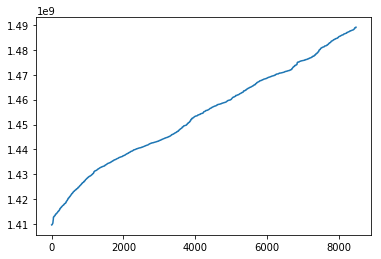

In [1]:
import numpy
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('bitcoin_single_addr.csv', usecols=[3], engine='python')
plt.plot(dataset)
plt.show()

5682 2799
5678
2795
Epoch 1/50
61s - loss: 0.0050
Epoch 2/50
58s - loss: 8.8953e-06
Epoch 3/50
67s - loss: 7.8205e-06
Epoch 4/50
55s - loss: 6.7217e-06
Epoch 5/50
59s - loss: 5.0965e-06
Epoch 6/50
59s - loss: 3.5551e-06
Epoch 7/50
58s - loss: 2.2541e-06
Epoch 8/50
59s - loss: 1.4181e-06
Epoch 9/50
54s - loss: 1.3597e-06
Epoch 10/50
53s - loss: 1.2679e-06
Epoch 11/50
55s - loss: 1.2643e-06
Epoch 12/50
55s - loss: 1.2559e-06
Epoch 13/50
55s - loss: 1.3439e-06
Epoch 14/50
56s - loss: 1.1947e-06
Epoch 15/50
53s - loss: 1.2697e-06
Epoch 16/50
58s - loss: 1.1380e-06
Epoch 17/50
54s - loss: 1.2893e-06
Epoch 18/50
55s - loss: 1.1577e-06
Epoch 19/50
58s - loss: 1.3103e-06
Epoch 20/50
57s - loss: 1.2054e-06
Epoch 21/50
61s - loss: 1.1086e-06
Epoch 22/50
66s - loss: 1.0055e-06
Epoch 23/50
54s - loss: 1.1220e-06
Epoch 24/50
55s - loss: 1.1167e-06
Epoch 25/50
59s - loss: 1.1607e-06
Epoch 26/50
58s - loss: 1.1952e-06
Epoch 27/50
58s - loss: 1.0503e-06
Epoch 28/50
55s - loss: 1.1183e-06
Epoch 29/50
5

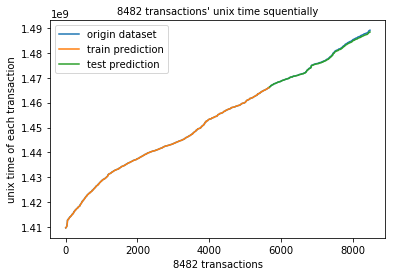

In [2]:
# fix random seed for reproducibility
numpy.random.seed(7)
# normalize the dataset making to between[0,1]
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# print(dataset)
# split into train and test sets of 67% and 33%
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(len(trainX))
print(len(testX))
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=50,
          batch_size=1, verbose=2)
import math
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
from sklearn.metrics import mean_squared_error
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset),label="origin dataset")
plt.plot(trainPredictPlot,label="train prediction")
plt.plot(testPredictPlot,label="test prediction")
plt.title("8482 transactions' unix time squentially",fontsize = 10)
plt.xlabel("8482 transactions")
plt.ylabel("unix time of each transaction")
plt.legend()
plt.show()

In [6]:
model.save_weights("bitcoin_time_model") 